# Analysis of the *Incident* Dataset
### Question 1: *Generate a word cloud based on the column “Reported occurrence narrative”.*

In [68]:
import pandas as pd
incidents = pd.read_json("../data/raw/incident.json").fillna("None")
incidents.columns = incidents.columns.str.upper().str.replace(' ', '')
cleanup = incidents["REPORTEDOCCURRENCENARRATIVE"].str.upper().str.replace(r'ELEVATOR', "")
incidents

,INCIDENTNUMBER,CREATIONDATE,FATALINJURYVICTIM,CONCUSSIONINTRACRANIALINJU,BURNSSEVERE,BURNSMINOR,WHIPLASH,SPINALINJURY,AMPUTATION,INJURYLEADINGDEAFNESS,...,NOINJURY,ELEVATINGDEVICESNUMBER,SPECIFICROOTCAUSE,REPORTEDOCCURRENCENARRATIVE,TIMEOFOCCURRENCE,SUMMARIZEDDETAILOFINSPECTIONANDTESTS,INSPECTOR'SCONCLUSION,INCIDENTSUMMARY,TASKNUMBER,RELEASE
0,518574,14-Jan-11,None,None,None,None,None,None,None,None,...,None,22202,None,Elevator-Flood on 13th floor ran down the stai...,2:00:00 PM,None,None,ED-Near Miss,3200103,yes
1,518582,14-Jan-11,None,None,None,None,None,None,None,None,...,None,22203,None,Elevator-Flood on 13th floor ran down stairs a...,2:00:00 PM,None,None,ED-Near Miss,3200141,yes
2,519464,17-Jan-11,None,None,None,None,None,None,None,None,...,None,87727,None,Elevator-Man with dog tried to kick dog leash ...,12:00:00 AM,None,None,ED-Incident,3202552,yes
3,524274,27-Jan-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,17594,None,Elevator - a piece of trim fell on person in e...,12:00:00 AM,None,None,ED-Incident,3212548,yes
4,519720,18-Jan-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,81630,None,Elevator-Elderly man exiting elevator got hit ...,7:30:00 PM,None,None,ED-Incident,3203135,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2441,1981072,22-Nov-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,7404,None,Elevator-Victim received shock from elevator h...,12:19:00 PM,None,None,Ed-Incident,6446748,yes
2442,1980824,22-Nov-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,67535,None,Elevator-Elevator car dropped 1 foot while doo...,1:15:00 AM,None,None,ED-Incident,6446147,yes
2443,1983098,25-Nov-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,15735,None,Elevator-tripped while exiting elevator,10:30:00 AM,None,None,ED-Incident,6451437,yes
2444,1981526,23-Nov-16,None,None,None,None,None,None,None,None,...,None,64507825,None,Elevator-Door restrictor not restricitng door ...,12:00:00 AM,None,None,ED-Near Miss,6447433,yes


In [47]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
def generate_wordcloud(text):
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
    plt.figure( figsize=(15,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

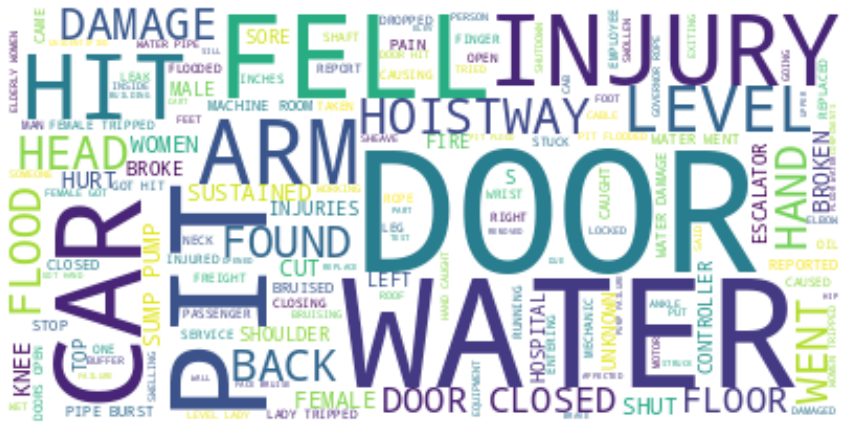

In [48]:
text = " ".join(i for i in cleanup)
generate_wordcloud(text)

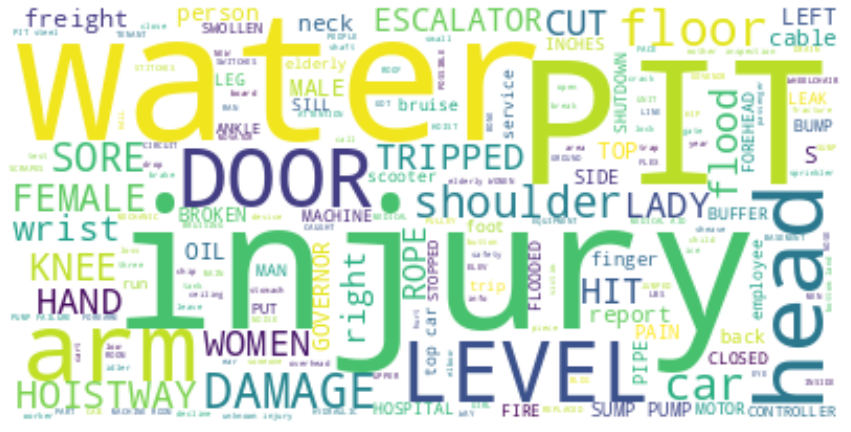

In [66]:
import spacy
nlp = spacy.load("en_core_web_sm")
doc = nlp(text)

text = " ".join(token.lemma_ for token in doc)
generate_wordcloud(text)